# Custom Tutorial 3: Using your model

In this tutorial, we demonstrate how to fit your custom model to data. The process is nearly identical to that of the precoded sub-module, so we will principally focus on what's different between the default and custom versions here. Refer to Default Tutorial 3 for use details.

The specific model we will use for this example is the urgency gating model with time depenedent drift discussed in PyBEAM's publication. In this model, the drift rate flips from positive, to negative, then back to positive. The model files for this example are on PyBEAM's github under the folder ugm_drift_flipping.

As before, import PyBEAM's custom sub-module.


In [1]:
# import PyBEAM's custom module
import pybeam.custom as pbc

# also import pyplot to modify figure axes
import matplotlib.pyplot as plt

# import os to check if you have input your model directory correctly
import os


In [2]:
# the directory containing your model goes here
model_dir = ''

# for windows computer, r before the directory is necessary
# model_dir = r''

# check if directory is input properly
os.path.isdir(model_dir)


True

In [3]:
# dictionary containing model parameters
phi = {'phi[0]' : 0.25,  # tnd: non-decision time
       'phi[1]' : 0.5,   # w: relative start point
       'phi[2]' : 1.0,   # mu: drift rate
       'phi[3]' : 3.0,   # l: leakage rate
       'phi[4]' : 2.0,   # k: urgency ratio
       'phi[5]' : 0.33,  # t0: time for first drift rate flip
       'phi[6]' : 0.66,  # t1: time for second drift rate flip
       'phi[7]' : 1.0,   # sigma: model scale
       'phi[8]' : 1.0,   # a: threshold location
       'phi[9]' : 0.05,  # g: contamination strength
       'phi[10]' : 0.25, # gl: lower threshold of uniform contamination distribution
       'phi[11]' : 2.0}  # gu: lower threshold of uniform contamination distribution
    
pbc.functions_test(model_dir = model_dir, # string containing directory name where your model files are
                         phi = phi,       # dictionary of model parameters
                           x = 0.0,       # accumulator state
                           t = 1.0)       # time


[['non_decision_time', 0.25],
 ['relative_start', 0.5],
 ['drift', 3.0],
 ['diffusion', 3.0],
 ['upper_decision_threshold', 1.0],
 ['lower_decision_threshold', -1.0],
 ['contamination_strength', 0.05],
 ['contamination_probability', 0.5714285714285714],
 ['modify_dt', 1.0]]

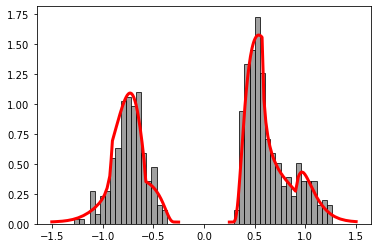

In [8]:
# simulate data set 0

phi0 = {'phi[0]' : 0.25,  # tnd: non-decision time
        'phi[1]' : 0.5,   # w: relative start point
        'phi[2]' : 1.0,   # mu: drift rate
        'phi[3]' : 3.0,   # l: leakage rate
        'phi[4]' : 2.0,   # k: urgency ratio
        'phi[5]' : 0.33,  # t0: time for first drift rate flip
        'phi[6]' : 0.66,  # t1: time for second drift rate flip
        'phi[7]' : 1.0,   # sigma: model scale
        'phi[8]' : 1.0,   # a: threshold location
        'phi[9]' : 0.05,  # g: contamination strength
        'phi[10]' : 0.25, # gl: lower threshold of uniform contamination distribution
        'phi[11]' : 2.0}  # gu: lower threshold of uniform contamination distribution

rt0 = pbc.simulate(model_dir = model_dir,
                      N_sims = 500,
                         phi = phi0)

pbc.plot_rt(model_dir = model_dir,
                  phi = phi0,
                   rt = rt0,
               rt_max = 1.5,
                 bins = 50);


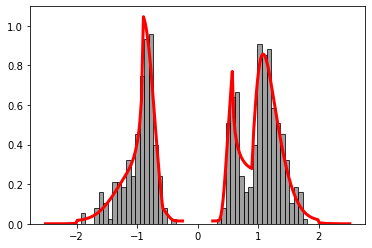

In [9]:
# simulate data set 1

phi1 = {'phi[0]' : 0.25,  # tnd: non-decision time
        'phi[1]' : 0.5,   # w: relative start point
        'phi[2]' : 1.0,   # mu: drift rate
        'phi[3]' : 3.0,   # l: leakage rate
        'phi[4]' : 2.0,   # k: urgency ratio
        'phi[5]' : 0.33,  # t0: time for first drift rate flip
        'phi[6]' : 0.66,  # t1: time for second drift rate flip
        'phi[7]' : 1.0,   # sigma: model scale
        'phi[8]' : 1.5,   # a: threshold location
        'phi[9]' : 0.05,  # g: contamination strength
        'phi[10]' : 0.25, # gl: lower threshold of uniform contamination distribution
        'phi[11]' : 2.0}  # gu: lower threshold of uniform contamination distribution

rt1 = pbc.simulate(model_dir = model_dir,
                      N_sims = 500,
                         phi = phi1)

pbc.plot_rt(model_dir = model_dir,
                  phi = phi1,
                   rt = rt1,
               rt_max = 2.5,
                 bins = 50);


In [10]:
# parameter inference

p = {'pphi[0]' : 'Uniform("t_nd", lower = 0.0, upper = 0.75)', # non-decision time prior
     'pphi[1]' : 'Uniform("w", lower = 0.3, upper = 0.7)',     # relative start point prior
     'pphi[2]' : 'Uniform("mu", lower = -5.0, upper = 5.0)',   # drift rate prior
     'pphi[3]' : 'Uniform("l", lower = 0.0, upper = 10.0)',    # leakage rate prior
     'pphi[4]' : 'Uniform("k", lower = 0.0, upper = 10.0)',    # urgency rate prior
     'pphi[5]' : 0.33,                                         # first drift flip time
     'pphi[6]' : 0.66,                                         # second drift flip time
     'pphi[7]' : 1.0,                                          # scaling parameter
     'pphi[8]0' : 'Uniform("a0", lower = 0.25, upper = 3.0)',  # decision threshold prior 0
     'pphi[8]1' : 'Uniform("a1", lower = 0.25, upper = 3.0)',  # decision threshold prior 1
     'pphi[9]' : 0.0,                                          # contamination strength (set to zero since we can't simulate it)
     'pphi[10]' : 0.0,                                         # lower threshold of contamination probability distribution
     'pphi[11]' : 1.0}                                         # upper threshold of contamination probability distribution

c0 = {'rt' : rt0,
  'phi[0]' : 'pphi[0]', 
  'phi[1]' : 'pphi[1]',  
  'phi[2]' : 'pphi[2]', 
  'phi[3]' : 'pphi[3]',  
  'phi[4]' : 'pphi[4]',  
  'phi[5]' : 'pphi[5]',
  'phi[6]' : 'pphi[6]', 
  'phi[7]' : 'pphi[7]',  
  'phi[8]' : 'pphi[8]0',
  'phi[9]' : 'pphi[9]',
  'phi[10]' : 'pphi[10]',
  'phi[11]' : 'pphi[11]'}  

c1 = {'rt' : rt1,
  'phi[0]' : 'pphi[0]', 
  'phi[1]' : 'pphi[1]',  
  'phi[2]' : 'pphi[2]', 
  'phi[3]' : 'pphi[3]',  
  'phi[4]' : 'pphi[4]',  
  'phi[5]' : 'pphi[5]',
  'phi[6]' : 'pphi[6]', 
  'phi[7]' : 'pphi[7]',  
  'phi[8]' : 'pphi[8]1',
  'phi[9]' : 'pphi[9]',
  'phi[10]' : 'pphi[10]',
  'phi[11]' : 'pphi[11]'}  
 
cond = {0 : c0, 1 : c1}

trace = pbc.inference(model_dir = model_dir, # specify model directory
                         priors = p,         # dictionary of priors
                     conditions = cond,      # conditions dictionary
                        samples = 50000,     # MCMC samples
                         chains = 3,         # MCMC chains 
                          cores = 3,         # CPU cores to run MCMC chains on
                      file_name = 'custom')  # output file name


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [t_nd, w, mu, l, k, a0, a1]


Sampling 3 chains for 0 tune and 50_000 draw iterations (0 + 150_000 draws total) took 122 seconds.


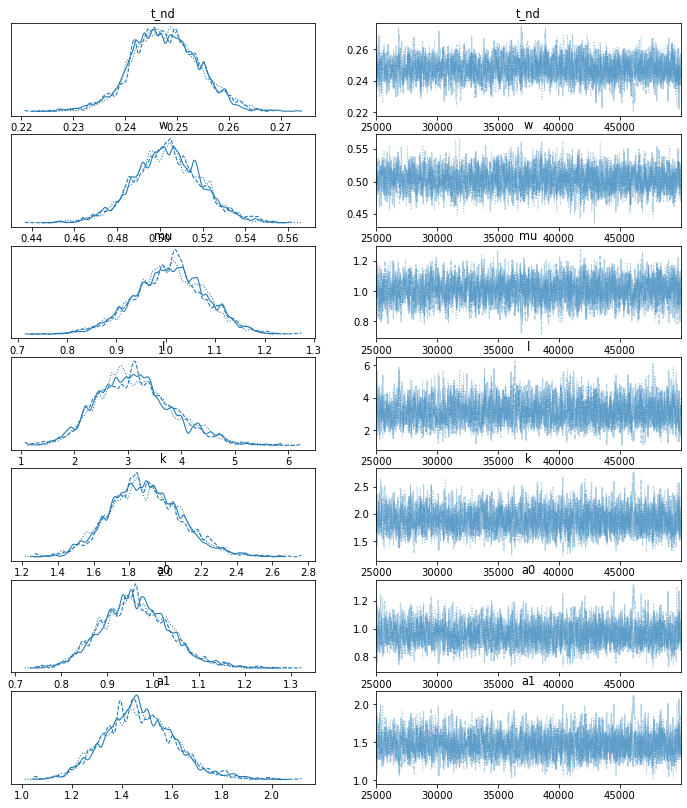

In [11]:
# summary of posteriors
pbc.plot_idata(file_name = 'custom', burnin = 25000);


In [12]:
# summary of posteriors
pbc.summary(file_name = 'custom', burnin = 25000)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
t_nd,0.248,0.006,0.236,0.260,0.000,0.000,1404.0,1988.0,1.0
w,0.504,0.016,0.474,0.534,0.000,0.000,1510.0,2696.0,1.0
mu,1.008,0.072,0.877,1.147,0.002,0.001,1992.0,3320.0,1.0
l,3.145,0.720,1.882,4.559,0.018,0.013,1613.0,2107.0,1.0
k,1.889,0.201,1.520,2.272,0.005,0.004,1632.0,2021.0,1.0
a0,0.962,0.076,0.818,1.099,0.002,0.001,1581.0,1744.0,1.0
a1,1.471,0.144,1.194,1.726,0.004,0.003,1579.0,1629.0,1.0
